## Import des librairies nécessaire

In [1]:
#importing necessary libraries that can be required anytime in solving this problem
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import * 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OrdinalEncoder
import os
for dirname, _, filenames in os.walk('/Users/annadiaw/Documents/Etudes/M1_BIG_DATA_IA/DeepLearning/Projet/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/benadem/Desktop/4IABD/4IADB_DL/goodreads_train.csv
/Users/benadem/Desktop/4IABD/4IADB_DL/.DS_Store
/Users/benadem/Desktop/4IABD/4IADB_DL/submission (5).csv
/Users/benadem/Desktop/4IABD/4IADB_DL/goodreadsreviewd (1).ipynb
/Users/benadem/Desktop/4IABD/4IADB_DL/Untitled.ipynb
/Users/benadem/Desktop/4IABD/4IADB_DL/goodreads_test.csv
/Users/benadem/Desktop/4IABD/4IADB_DL/Untitled4.ipynb
/Users/benadem/Desktop/4IABD/4IADB_DL/submission.csv
/Users/benadem/Desktop/4IABD/4IADB_DL/submission_file.csv
/Users/benadem/Desktop/4IABD/4IADB_DL/goodreadsreviewd-updated.ipynb
/Users/benadem/Desktop/4IABD/4IADB_DL/goodreads_sample_submission.csv
/Users/benadem/Desktop/4IABD/4IADB_DL/[Exemples] Expérimentations vues en cours (convolution)/softmax_trick.py
/Users/benadem/Desktop/4IABD/4IADB_DL/[Exemples] Expérimentations vues en cours (convolution)/.DS_Store
/Users/benadem/Desktop/4IABD/4IADB_DL/[Exemples] Expérimentations vues en cours (convolution)/my_own_conv.py
/Users/benadem/Desktop/4IABD/4IADB

## Lecture de nos fichiers CSV ( training set et le test set  )

In [2]:
#reading the 2 data files ( The Training set and the testing set)
dftr = pd.read_csv("/Users/annadiaw/Documents/Etudes/M1_BIG_DATA_IA/DeepLearning/Projet/goodreads_train.csv"")
dfte = pd.read_csv("/Users/annadiaw/Documents/Etudes/M1_BIG_DATA_IA/DeepLearning/Projet/goodreads_test.csv")

## Voir le contenu de nos fichiers CSV (les colonnes de la table)

In [3]:
# Show the columns of the training set 
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


In [4]:
# Show the columns of the testing set 
dfte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478033 entries, 0 to 478032
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       478033 non-null  object
 1   book_id       478033 non-null  int64 
 2   review_id     478033 non-null  object
 3   review_text   478033 non-null  object
 4   date_added    478033 non-null  object
 5   date_updated  478033 non-null  object
 6   read_at       435555 non-null  object
 7   started_at    334989 non-null  object
 8   n_votes       478033 non-null  int64 
 9   n_comments    478033 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 36.5+ MB


## L'analyse de nos données 

In [5]:
## How many reviews are there for each rating ?
dftr.rating.value_counts()

4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
Name: rating, dtype: int64

<AxesSubplot: xlabel='rating', ylabel='count'>

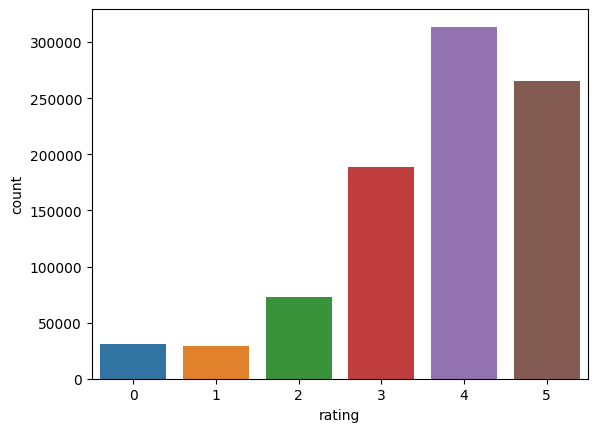

In [6]:
#Plotting category count of the rating column
sns.countplot(data=dftr,x="rating")

In [7]:
## How many characters, words and sentences in each review of the training test
dftr["characters"]=dftr["review_text"].apply(len) 
dftr["words"]=dftr["review_text"].apply(lambda p:len(nltk.word_tokenize(p)))
dftr["sentences"]=dftr["review_text"].apply(lambda p:len(nltk.sent_tokenize(p)))

In [8]:
## Create a cloud of the most used words
from wordcloud import WordCloud
wcobj = WordCloud(width=1000,height=1000,min_font_size=10,background_color="blue")
wc = wcobj.generate(dftr["review_text"].str.cat(sep=" "))

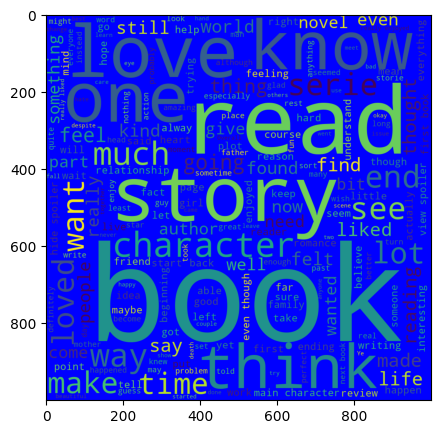

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(wcobj)

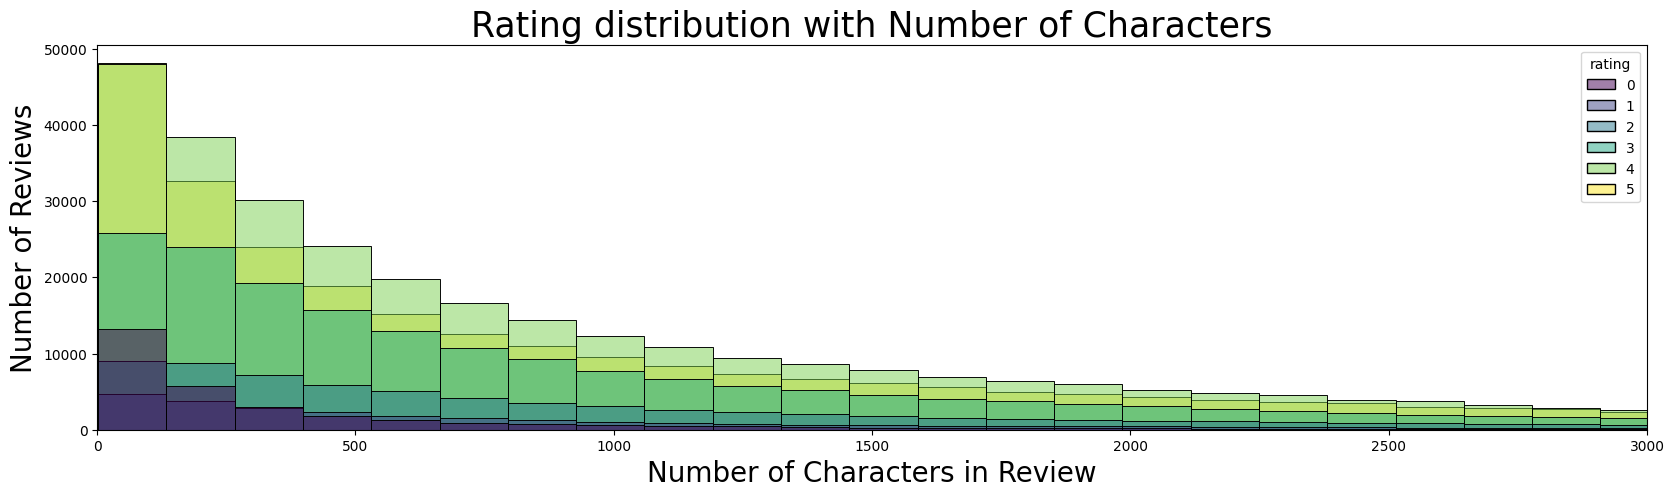

In [10]:
##Rating distribution with Number of Characters
plt.figure(figsize=(20,5))
sns.histplot(data=dftr,x="characters",hue="rating",palette="viridis",bins=150)
plt.xlim(0,3000)
plt.xlabel("Number of Characters in Review",fontsize=20)
plt.ylabel("Number of Reviews",fontsize=20)
plt.title("Rating distribution with Number of Characters",fontsize=25)
plt.show()

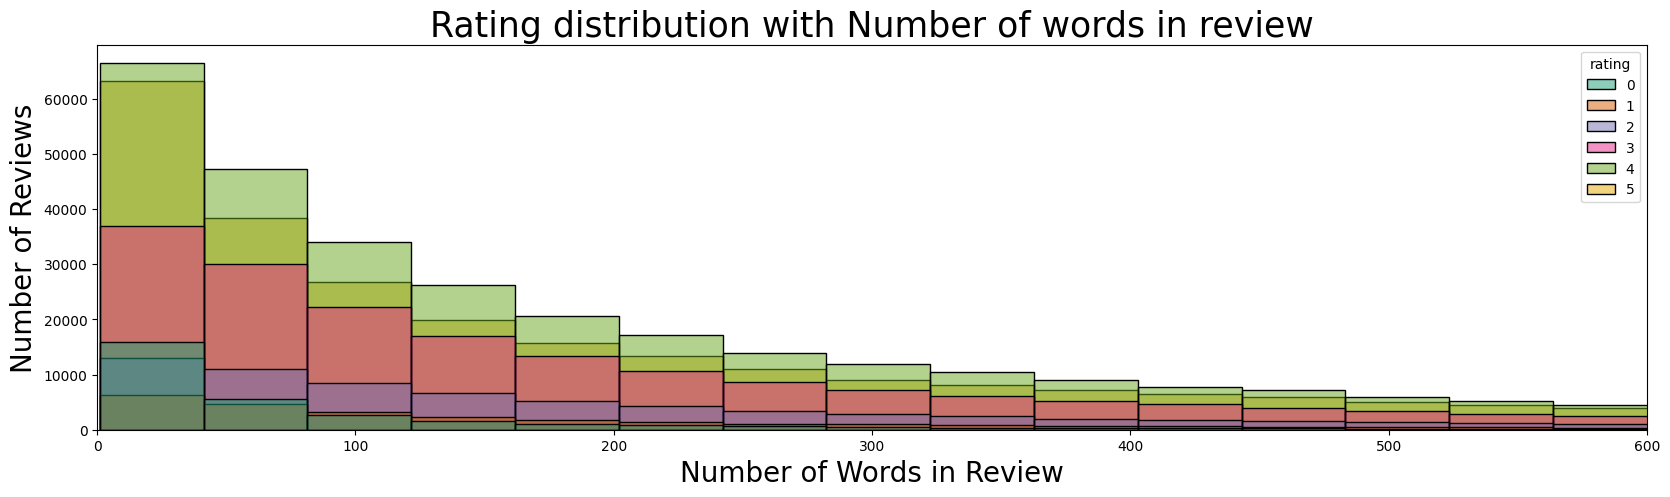

In [11]:
## Rating distribution with Number of words in review
plt.figure(figsize=(20,5))
sns.histplot(data=dftr,x="words",hue="rating",palette="Dark2",bins=100)
plt.xlim(0,600)
plt.xlabel("Number of Words in Review",fontsize=20)
plt.ylabel("Number of Reviews",fontsize=20)
plt.title("Rating distribution with Number of words in review",fontsize=25)
plt.show()

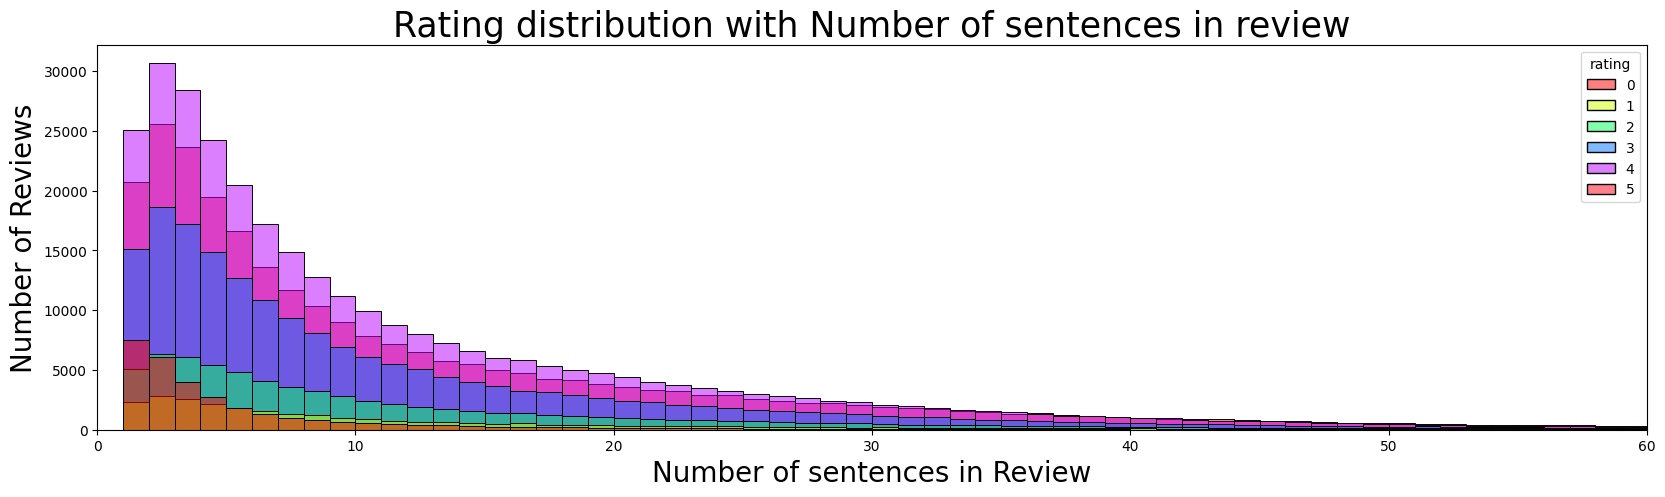

In [12]:
## Rating distribution with Number of sentences in review
plt.figure(figsize=(20,5))
sns.histplot(data=dftr,x="sentences",hue="rating",palette="hsv",binwidth=1)
plt.xlim(0,60)
plt.xlabel("Number of sentences in Review",fontsize=20)
plt.ylabel("Number of Reviews",fontsize=20)
plt.title("Rating distribution with Number of sentences in review",fontsize=25)
plt.show()

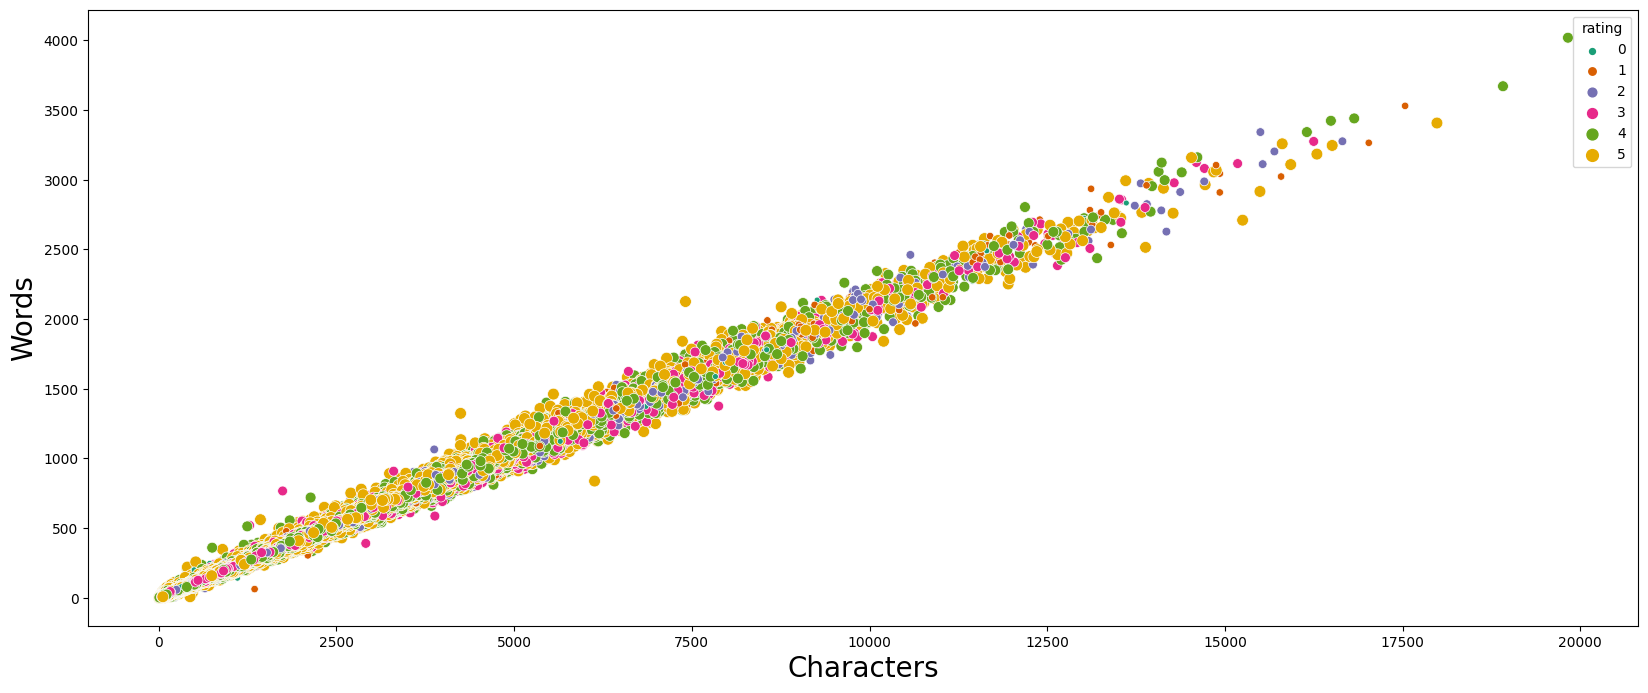

In [13]:
#### Rating distribution with Number of words and characters in review
plt.figure(figsize=(20,8))
sns.scatterplot(data=dftr,x="characters",y="words",hue="rating",size="rating",palette="Dark2")
plt.xlabel("Characters",fontsize=20)
plt.ylabel("Words",fontsize=20)
plt.show()

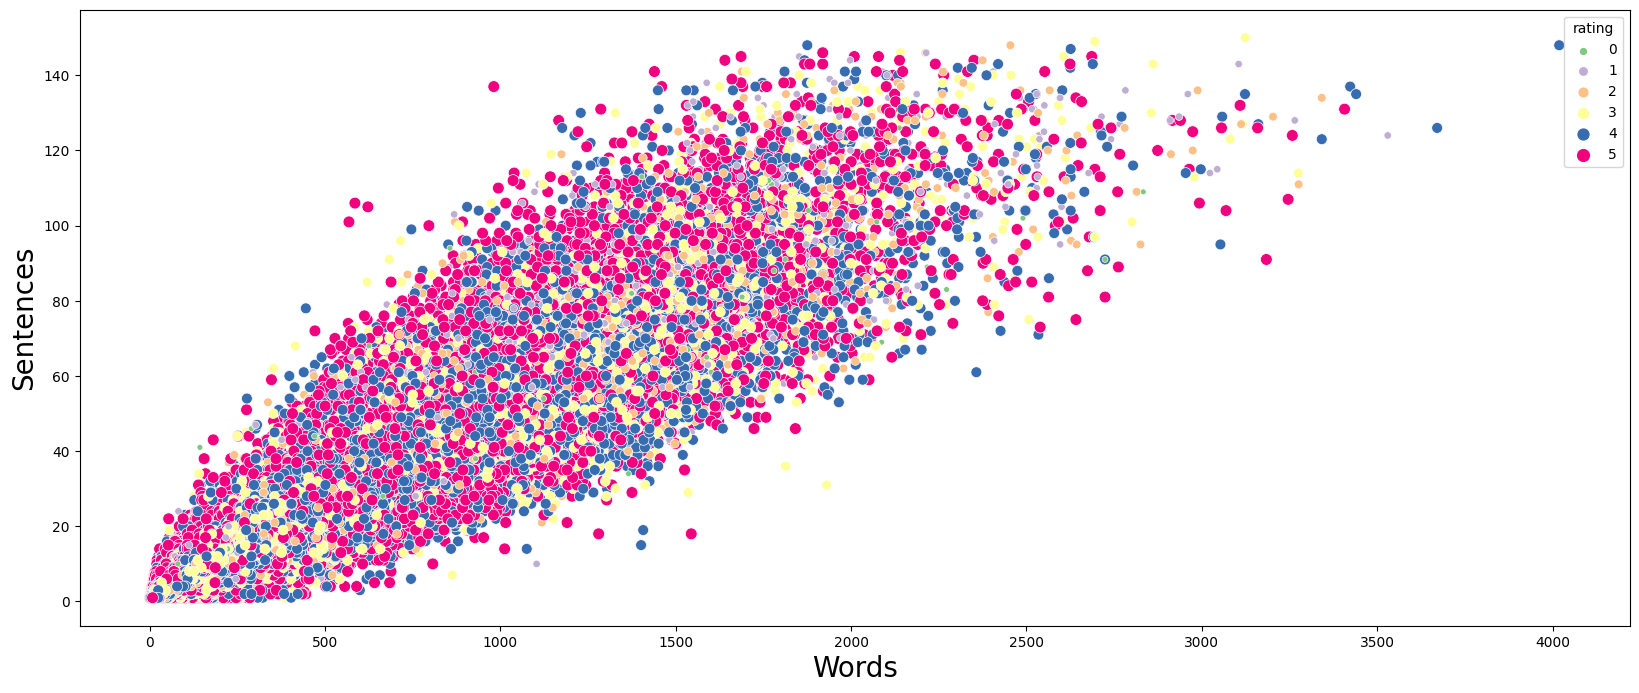

In [14]:
#### Rating distribution with Number of words and sentences in review
plt.figure(figsize=(20,8))
sns.scatterplot(data=dftr,x="words",y="sentences",hue="rating",size="rating",palette="Accent")
plt.xlabel("Words",fontsize=20)
plt.ylabel("Sentences",fontsize=20)
plt.show()

## Réalisation du model

In [15]:
#Extracting review column from both dataframes to combine
dfre = dftr[["review_text"]]
dfret = dfte[["review_text"]]
text = pd.concat([dfre,dfret])
text.shape
print(text)

                                              review_text
0       This is a special book. It started slow for ab...
1       Recommended by Don Katz. Avail for free in Dec...
2       A fun, fast paced science fiction thriller. I ...
3       Recommended reading to understand what is goin...
4       I really enjoyed this book, and there is a lot...
...                                                   ...
478028  Can't wait for Travis' POV \n Travis Before Ab...
478029  Had this on my to-read shelf forever. Will upd...
478030  The last book left me wanting for more. I need...
478031  Things are heating up in the second novel of I...
478032  Before I even start this review, I must say th...

[1378033 rows x 1 columns]


In [16]:
#Extracting common words in english that are used in almost every review, to remove them from text for better analysis
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
%%time
#generating text features from the review text (the combined columns of the dfs)/ Find the most important words
#Using term frequency-inverse document frequency
#How freauently a term occurs in a document
#the weight of rare words, the words that occur rarely in the document have high scor
# Term = words and document = rows 
word_vectorizer = TfidfVectorizer(analyzer='word',stop_words=stopwords,ngram_range=(1, 1),max_features=50000)


CPU times: user 40 µs, sys: 16 µs, total: 56 µs
Wall time: 66 µs


In [18]:
#Learn vocabulary and idf from training set, converting the words to numbers
word_vectorizer.fit(text.review_text)
##print(word_vectorizer.vocabulary_)

TfidfVectorizer(max_features=50000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [19]:
#return document-term matrix
train = word_vectorizer.transform(dfre.review_text)
print(train)

  (0, 49341)	0.11493711186904618
  (0, 49000)	0.08085467853965826
  (0, 48356)	0.060852709487354724
  (0, 47703)	0.042443314364257564
  (0, 47039)	0.10940278294973584
  (0, 46954)	0.13047797066277353
  (0, 46740)	0.19751556818007615
  (0, 46486)	0.04607474627788051
  (0, 45763)	0.1488722710250743
  (0, 45509)	0.09403811903188905
  (0, 45085)	0.04138480944755634
  (0, 44695)	0.08556347909920022
  (0, 44682)	0.06781028167085316
  (0, 44636)	0.1626707119984583
  (0, 44626)	0.050893994792435955
  (0, 44622)	0.09128077854653813
  (0, 44620)	0.06754256682743913
  (0, 44204)	0.04764727065485839
  (0, 42807)	0.05384663927141063
  (0, 42437)	0.03230904410939436
  (0, 42237)	0.11414341354514876
  (0, 42201)	0.08977480964983153
  (0, 41831)	0.08409057679158594
  (0, 41629)	0.05939408137815914
  (0, 41353)	0.04486608637885332
  :	:
  (899999, 21708)	0.13917650369189927
  (899999, 21559)	0.08392353178788958
  (899999, 18855)	0.14006283867126967
  (899999, 18727)	0.08800333071857377
  (899999, 18720

In [20]:
test = word_vectorizer.transform(dfret.review_text)
print(test)

  (0, 49643)	0.04116839022383185
  (0, 49060)	0.2907625540173439
  (0, 49059)	0.0652379735217039
  (0, 49057)	0.13390959173943837
  (0, 48403)	0.07844340908728682
  (0, 48356)	0.027336605555623623
  (0, 48108)	0.08062113904013717
  (0, 48106)	0.07438544677793124
  (0, 47219)	0.04981872989814795
  (0, 47035)	0.06693790169152844
  (0, 45860)	0.1331972616071542
  (0, 44923)	0.02644613159849328
  (0, 44682)	0.06092425261810403
  (0, 44620)	0.03034186190114893
  (0, 43820)	0.06633850322961544
  (0, 43241)	0.0896872064950996
  (0, 42566)	0.06537539505636931
  (0, 42531)	0.045232588967090655
  (0, 41831)	0.03777565449528828
  (0, 41361)	0.0320030336085362
  (0, 40363)	0.06257567418219837
  (0, 38895)	0.13235511404895772
  (0, 37920)	0.056008340841585534
  (0, 37132)	0.045107016093664826
  (0, 36767)	0.05541109001736361
  :	:
  (478032, 4905)	0.046625364252333844
  (478032, 4659)	0.027027127886556347
  (478032, 4564)	0.03358102387199465
  (478032, 4552)	0.027447201749425238
  (478032, 4414)	0.

In [21]:
#taking rating column as target variable
y=dftr[["rating"]]

In [22]:
#importing logistic regression model for classification
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(max_iter=50000)

In [24]:
#training the model on 50000 features
model.fit(train,y.values.ravel())

LogisticRegression(max_iter=50000)

In [25]:
#taking prediction from the trained model
pred = model.predict(test)
print(pred)

[4 4 4 ... 5 5 5]


In [26]:
sub = pd.read_csv("/Users/annadiaw/Documents/Etudes/M1_BIG_DATA_IA/DeepLearning/Projet/goodreads-books-reviews/goodreads_sample_submission.csv")

In [27]:
sub["rating"] = pred
sub

,review_id,rating
0,5c4df7e70e9b438c761f07a4620ccb7c,4
1,8eaeaf13213eeb16ad879a2a2591bbe5,4
2,dce649b733c153ba5363a0413cac988f,4
3,8a46df0bb997269d6834f9437a4b0a77,4
4,d11d3091e22f1cf3cb865598de197599,4
...,...,...
478028,0e1db3d4b04256f9660f5d276ddf1314,4
478029,0b7f352e58caf0fd1f961e98ef04e89c,5
478030,9b19eff33ddb14e9e68fca2e90379e46,5
478031,8be463fed78f0da63e964706f710332b,5


In [30]:
#preparing file to submit
sub.to_csv("submission_file.csv",index=False)